In [1]:
# remove the notebook root logger.\n",
import logging
logger = logging.getLogger()
logger.handlers = []

%matplotlib inline

In [2]:
import pandas as pd


csvfile_link = "https://raw.githubusercontent.com/antoinecarme/TimeSeriesData/master/ozone-la.csv"
ozone_dataframe = pd.read_csv(csvfile_link);
import datetime
ozone_dataframe['Month'] = ozone_dataframe['Month'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m"))
ozone_dataframe.head()

,Month,Ozone
0,1955-01-01,2.7
1,1955-02-01,2.0
2,1955-03-01,3.6
3,1955-04-01,5.0
4,1955-05-01,6.5


In [3]:
def create_model(iActivateCrossVal , iFolds):
    import pyaf.ForecastEngine as autof
    lEngine = autof.cForecastEngine()
    if(iActivateCrossVal):
        lEngine.mOptions.mCrossValidationOptions.mMethod = "TSCV";
        lEngine.mOptions.mCrossValidationOptions.mNbFolds = iFolds
    lEngine.train(ozone_dataframe[:-12] , 'Month' , 'Ozone', 12);
    lEngine.getModelInfo();
    return lEngine

In [4]:
model_no_cross_valid = create_model(False , None)
model_with_cross_valid_5 = create_model(True , 5)
model_with_cross_valid_10 = create_model(True , 10)


INFO:pyaf.std:START_TRAINING 'Ozone'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS '['Ozone']' 2.4314606189727783
INFO:pyaf.std:TIME_DETAIL TimeVariable='Month' TimeMin=1955-01-01T00:00:00.000000 TimeMax=1967-09-01T00:00:00.000000 TimeDelta=<DateOffset: months=1> Horizon=12
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Ozone' Length=204  Min=1.2 Max=8.7  Mean=3.8357843137254894 StdDev=1.491559215940118
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Ozone' Min=1.2 Max=8.7  Mean=3.8357843137254894 StdDev=1.491559215940118
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Ozone_LinearTrend_residue_zeroCycle_residue_AR(51)' [LinearTrend + NoCycle + AR]
INFO:pyaf.std:TREND_DETAIL '_Ozone_LinearTrend' [LinearTrend]
INFO:pyaf.std:CYCLE_DETAIL '_Ozone_LinearTrend_residue_zeroCycle' [NoCycle]
INFO:pyaf.std:AUTOREG_DETAIL '_Ozone_LinearTrend_residue_zeroCycle_residue_AR(51)' [AR]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=0.1641 MAPE_Forecast=0.1595 MAPE

INFO:pyaf.std:MODEL_MEDIAN_AE MedAE_Fit=0.49805052772713987 MedAE_Forecast=0.33854127078339147 MedAE_Test=0.36127985864451984
INFO:pyaf.std:MODEL_COMPLEXITY 54
INFO:pyaf.std:SIGNAL_TRANSFORMATION_DETAIL_START
INFO:pyaf.std:SIGNAL_TRANSFORMATION_MODEL_VALUES NoTransf None
INFO:pyaf.std:SIGNAL_TRANSFORMATION_DETAIL_END
INFO:pyaf.std:TREND_DETAIL_START
INFO:pyaf.std:LINEAR_RIDGE_TREND LinearTrend (5.022578136250887, array([-1.82712926]))
INFO:pyaf.std:TREND_DETAIL_END
INFO:pyaf.std:CYCLE_MODEL_DETAIL_START
INFO:pyaf.std:ZERO_CYCLE_MODEL_VALUES _Ozone_LinearTrend_residue_zeroCycle 0.0 {}
INFO:pyaf.std:CYCLE_MODEL_DETAIL_END
INFO:pyaf.std:AR_MODEL_DETAIL_START
INFO:pyaf.std:AR_MODEL_COEFF 1 _Ozone_LinearTrend_residue_zeroCycle_residue_Lag1 0.43496344136033716
INFO:pyaf.std:AR_MODEL_COEFF 2 _Ozone_LinearTrend_residue_zeroCycle_residue_Lag10 0.19036685617533314
INFO:pyaf.std:AR_MODEL_COEFF 3 _Ozone_LinearTrend_residue_zeroCycle_residue_Lag7 -0.16906339635225448
INFO:pyaf.std:AR_MODEL_COEFF 4 

In [5]:
model_no_cross_valid_forecast = model_no_cross_valid.forecast(ozone_dataframe, 12);
model_with_cross_valid_10_forecast = model_with_cross_valid_10.forecast(ozone_dataframe, 12);
model_with_cross_valid_5_forecast = model_with_cross_valid_5.forecast(ozone_dataframe, 12);


INFO:pyaf.std:START_FORECASTING '['Ozone']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['Ozone']' 0.49247026443481445
INFO:pyaf.std:START_FORECASTING '['Ozone']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['Ozone']' 0.47718167304992676
INFO:pyaf.std:START_FORECASTING '['Ozone']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['Ozone']' 0.472522497177124


<AxesSubplot:xlabel='Month'>

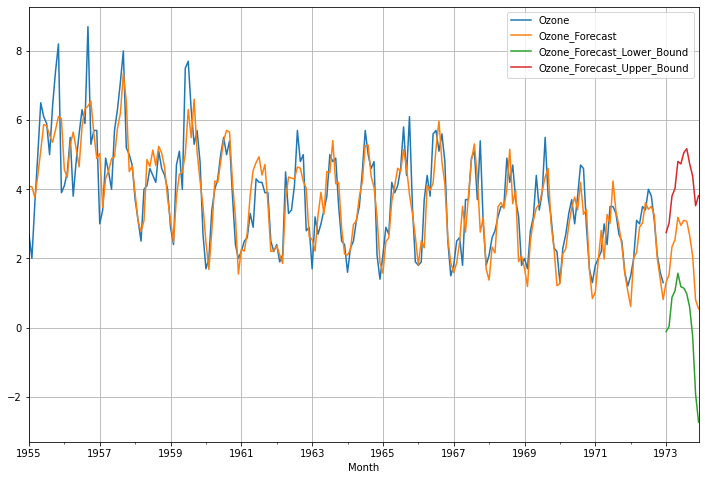

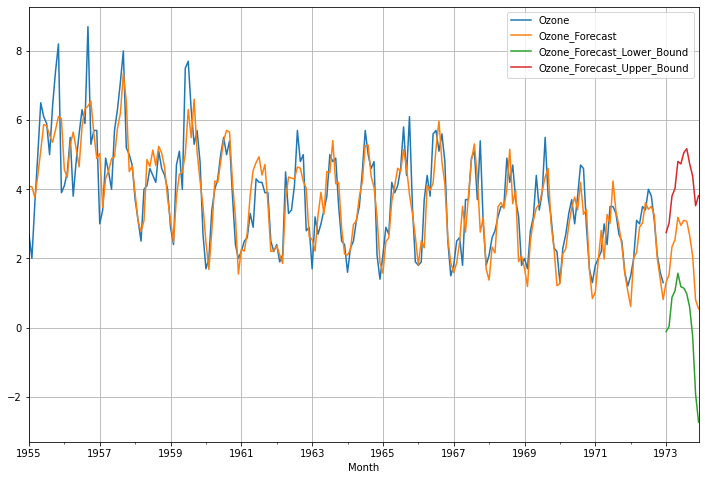

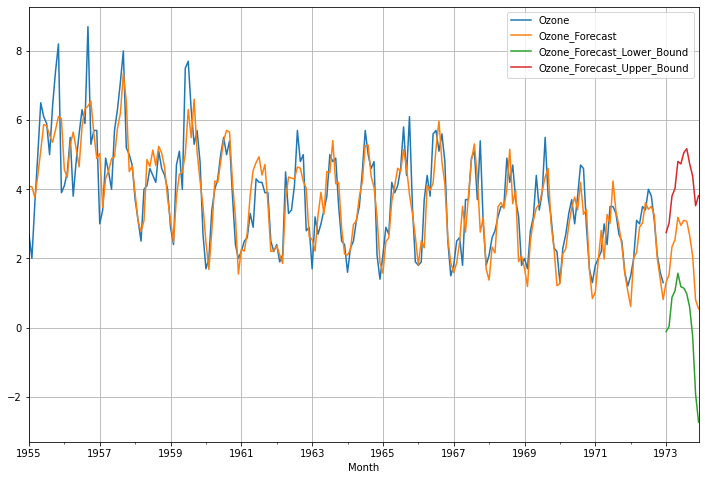

In [6]:
model_no_cross_valid_forecast.plot.line('Month', ['Ozone' , 'Ozone_Forecast', 
                                             'Ozone_Forecast_Lower_Bound', 
                                             'Ozone_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))
model_with_cross_valid_10_forecast.plot.line('Month', ['Ozone' , 'Ozone_Forecast', 
                                             'Ozone_Forecast_Lower_Bound', 
                                             'Ozone_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))
model_with_cross_valid_5_forecast.plot.line('Month', ['Ozone' , 'Ozone_Forecast', 
                                             'Ozone_Forecast_Lower_Bound', 
                                             'Ozone_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))
